In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
from sklearn.model_selection import train_test_split
from statsmodels.formula.api import ols
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import koreanize_matplotlib

In [3]:
# 데이터 불러오기
file_name='winequality-red.csv'
df_red=pd.read_csv(file_name)

file_name2='winequality-white.csv'
df_white=pd.read_csv(file_name2)
# 색깔 구분자 생성 및 결합

df_red['color']=0
df_white['color']=1
df_mix=pd.concat([df_white, df_red], axis=0)
df_mix= df_mix.reset_index(drop=True)
print(df_mix)

      fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0               7.0             0.270         0.36            20.7      0.045   
1               6.3             0.300         0.34             1.6      0.049   
2               8.1             0.280         0.40             6.9      0.050   
3               7.2             0.230         0.32             8.5      0.058   
4               7.2             0.230         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
6492            6.2             0.600         0.08             2.0      0.090   
6493            5.9             0.550         0.10             2.2      0.062   
6494            6.3             0.510         0.13             2.3      0.076   
6495            5.9             0.645         0.12             2.0      0.075   
6496            6.0             0.310         0.47             3.6      0.067   

      free_sulfur_dioxide  

In [4]:
df_mix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


In [5]:
# 상관관계 확인
df_mix.corr()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
fixed_acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743,-0.486740
volatile_acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699,-0.653036
citric_acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532,0.187397
residual_sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980,0.348821
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666,-0.512678
free_sulfur_dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463,0.471644
total_sulfur_dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385,0.700357
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858,-0.390645
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506,-0.329129
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.038485,-0.487218


In [6]:
# t테스트
def t_test():
    for name in df.columns:
        a=scipy.stats.ttest_ind(df[name], df2[name], equal_var=False)
        print(name)
        print()
        print(a)
        print()
# t_test()

In [7]:
print(df_red['density'].mean())
df_white['density'].mean()


0.9967466791744841


0.9940273764801959

In [13]:
from scipy.stats import bartlett
red_density= df_red['density']
white_density= df_white['density']

print(bartlett(red_density, white_density))

import scipy.stats as stats

t_stat, p_value = stats.ttest_ind(red_density, white_density, equal_var = False)
t_stat, p_value


BartlettResult(statistic=430.5766981952509, pvalue=1.2172223684463467e-95)


(42.70851107543416, 0.0)

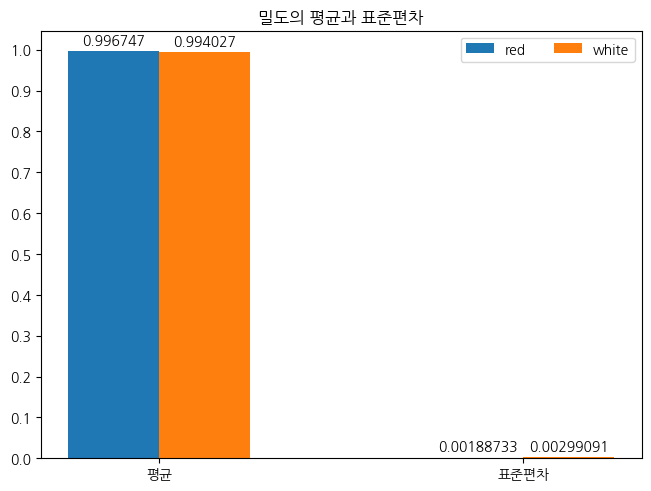

In [9]:
search=df_mix['color']==0
# 평균 데이터 삽입
red=df_mix[search]['density'].mean()
white=df_mix[~search]['density'].mean()

# 표준편차 데이터 삽입
red2=df_mix[search]['density'].std()
white2=df_mix[~search]['density'].std()

# x축 데이터
wines= ('평균', '표준편차')
# y축 데이터
data={
    'red': (red, red2),
    'white': (white, white2)
}
x=np.arange(2)
width=0.25
multiplier=0

fig, ax= plt.subplots(layout='constrained')

for attribute, measurement in data.items():
    offset= width * multiplier
    rects= ax.bar(x+ offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier+=1
ax.set_title('밀도의 평균과 표준편차')
ax.set_xticks(x + width/2, wines)
ax.set_yticks(np.arange(0,1.1,0.1))
ax.legend(loc='upper right', ncols=2)
plt.show()


[Text(0, 0, '0.994027'), Text(0, 0, '0.00299091')]

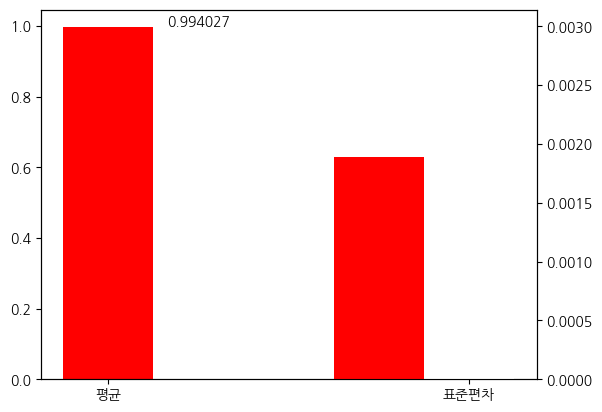

In [18]:
df_red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-null   float64
 2   citric_acid           1599 non-null   float64
 3   residual_sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free_sulfur_dioxide   1599 non-null   float64
 6   total_sulfur_dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
 12  color                 1599 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 162.5 KB


In [19]:
df_white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         4898 non-null   float64
 1   volatile_acidity      4898 non-null   float64
 2   citric_acid           4898 non-null   float64
 3   residual_sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free_sulfur_dioxide   4898 non-null   float64
 6   total_sulfur_dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
 12  color                 4898 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 497.6 KB
